In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
import os

# Mount your drive if not already done
from google.colab import drive
drive.mount('/content/drive')

# Check folder structure
os.listdir("/content/drive/MyDrive/project")


Mounted at /content/drive


['archive (5)', 'split_dataset']

In [4]:
# Path to dataset containing 6 folders: cardboard, glass, metal, paper, plastic, trash
DATASET_PATH = "/content/drive/MyDrive/project/archive (5)/TrashType_Image_Dataset"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    directory=DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    directory=DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 1877 images belonging to 6 classes.
Found 467 images belonging to 6 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,166 (91.20 MB)

 Trainable params: 23,908,166 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 438s 7s/step - accuracy: 0.2558 - loss: 3.0393 - val_accuracy: 0.4325 - val_loss: 1.3781
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.4845 - loss: 1.3050 - val_accuracy: 0.5011 - val_loss: 1.2676
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.5684 - loss: 1.1393 - val_accuracy: 0.5889 - val_loss: 1.2392
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.6674 - loss: 0.9268 - val_accuracy: 0.5867 - val_loss: 1.2092
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.7467 - loss: 0.7021 - val_accuracy: 0.5760 - val_loss: 1.4378
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.8208 - loss: 0.5085 - val_accuracy: 0.5203 - val_loss: 1.5234
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.8747 - loss: 0.4244 - val_accuracy: 0.5310 - val_loss: 1.6363
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 178s 3s/step - accuracy: 0.8754 - loss: 0.3778 - val_accuracy: 0.5867 - v

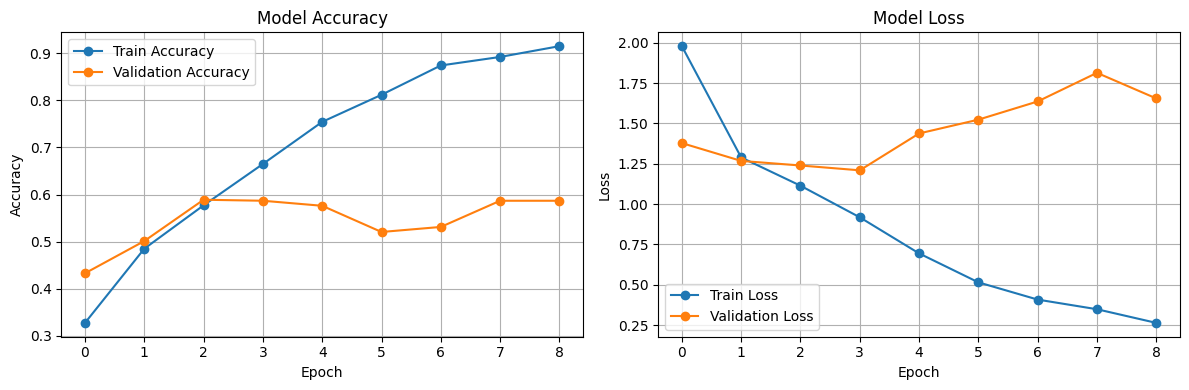

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 716ms/step
🔍 Classification Report:
              precision    recall  f1-score   support

   cardboard       0.67      0.74      0.70        42
       glass       0.58      0.56      0.57       100
       metal       0.57      0.34      0.43        82
       paper       0.68      0.63      0.65       118
     plastic       0.52      0.77      0.62        98
       trash       0.43      0.37      0.40        27

    accuracy                           0.59       467
   macro avg       0.58      0.57      0.56       467
weighted avg       0.59      0.59      0.58       467



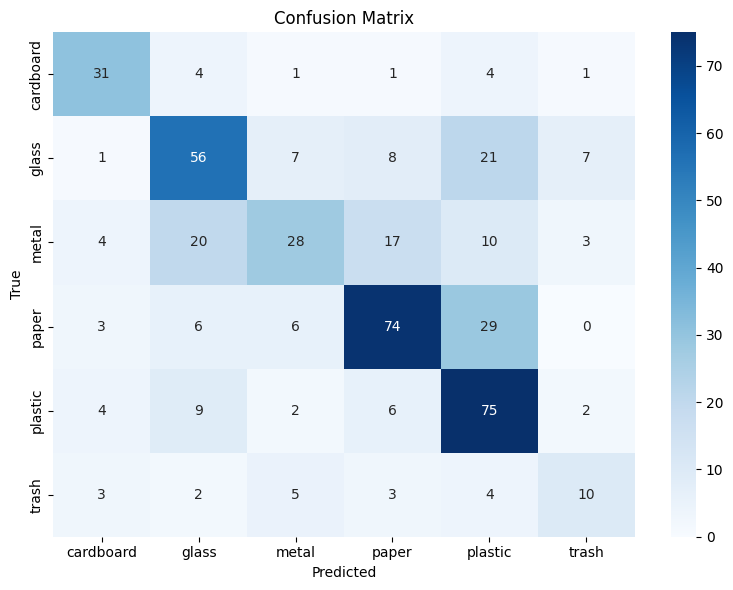

In [13]:
# Predict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

val_generator.reset()
preds = model.predict(val_generator, verbose=1)

# True and predicted labels
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes
labels = list(val_generator.class_indices.keys())
num_classes = len(labels)

# Classification report
print("🔍 Classification Report:")
print(classification_report(
    y_true, y_pred,
    labels=list(range(num_classes)),
    target_names=labels,
    zero_division=0
))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=list(range(num_classes)))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
